In [1]:
#Importing the necessary libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from tensorflow.keras.layers import Layer,Dense, Flatten,Dropout,Lambda,Input,BatchNormalization
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

2.17.0


In [2]:
#Importing the drive to gain access to the concerned dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PIMA INDIANS DATASET/diabetes.csv')


In [4]:
#Quick check of the values from the top and the bottom
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
#Quick scan of the information pertaining to the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Quick Statistics on the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
print('The number of features in this dataset is',len(df.columns))
print('They are as follows:')
for i in range(9):
  print(i+1,':',df.columns[i])

The number of features in this dataset is 9
They are as follows:
1 : Pregnancies
2 : Glucose
3 : BloodPressure
4 : SkinThickness
5 : Insulin
6 : BMI
7 : DiabetesPedigreeFunction
8 : Age
9 : Outcome


In [9]:
#Separating the input parameters from the outcomes
y=df["Outcome"]
x=df.drop("Outcome",axis='columns')

#Instantiating Standard Scalar
scaler=StandardScaler()

In [10]:
#Splitting original dataset into training and validation sets in ratio 80:20
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3,random_state=42,shuffle=True)

print(f"The size of the training set is {x_train.shape}")
print(f"the size of the validation set is {x_val.shape}")
print(f"the size of the original set is {x.shape}")

The size of the training set is (537, 8)
the size of the validation set is (231, 8)
the size of the original set is (768, 8)


In [11]:
#Normalizing the data
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)

In [12]:
#Defining the model for training
def Dense_Model():
  input_layer=Input(shape=(8,))
  Dense_1=Dense(units=128,activation='relu')(input_layer)
  Batch_norm1=BatchNormalization()(Dense_1)
  Dense_2=Dense(units=128,activation='relu')(Batch_norm1)
  dropout_layer1=Dropout(0.35)(Dense_2)
  output=Dense(units=1,activation='sigmoid')(dropout_layer1)
  return Model(inputs=input_layer,outputs=output)

In [13]:
#Converting the series in the dataframe to numpy arrays
y_train=y_train.values
x_train=np.array(x_train)
x_val=np.array(x_val)
y_val=y_val.values

In [14]:
#Setting the values of the hyperparameters separately
B1=0.99
B2=0.9999
LR=0.00002
BATCH_SIZE=150

In [15]:
#Building the TensorFlow datasets using numpy arrays
training_dataset=tf.data.Dataset.from_tensor_slices((x_train,y_train))
val_dataset=tf.data.Dataset.from_tensor_slices((x_val,y_val))

batch_size=BATCH_SIZE
buffer_size=len(x_train)

#Ensuring that the data from the dataset is sent out in batches after shuffling
training_dataset=training_dataset.shuffle(buffer_size=buffer_size).batch(batch_size=batch_size)

val_dataset=val_dataset.batch(batch_size=batch_size)

In [16]:
#Instantiating the model
#beta_2=0.999,learning_rate=0.0002
m=Dense_Model()

m.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(beta_1=B1,beta_2=B2,learning_rate=LR),metrics=['accuracy'])

In [17]:
m.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,305 (71.50 KB)

 Trainable params: 18,049 (70.50 KB)

 Non-trainable params: 256 (1.00 KB)

In [18]:
history=m.fit(training_dataset,
              epochs=200,
              validation_data=val_dataset,
              verbose=1)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.5400 - loss: 0.7804 - val_accuracy: 0.4156 - val_loss: 0.7068
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5241 - loss: 0.7850 - val_accuracy: 0.4242 - val_loss: 0.7049
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5206 - loss: 0.7519 - val_accuracy: 0.4329 - val_loss: 0.7030
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5602 - loss: 0.7676 - val_accuracy: 0.4242 - val_loss: 0.7011
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5360 - loss: 0.7506 - val_accuracy: 0.4416 - val_loss: 0.6991
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5391 - loss: 0.7438 - val_accuracy: 0.4545 - val_loss: 0.6972
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5677 - loss: 0.6902 - val_accuracy: 0.4719 - val_loss: 0.6951
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5363 - loss: 0.7406 - val_accuracy: 0.4892 - val_loss

In [19]:
#Making predictions on the validation dataset

threshold=0.5
#If the probability is greater than 0.5, the value is assigned it (given that this a binary output condition)
y_hat_prob=m.predict(val_dataset)
y_hat=(y_hat_prob>threshold).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


In [20]:
#Measuring the accuracy and the classification report
print(f"Validation accuracy is : {accuracy_score(y_val,y_hat)*100}")

print(f"Classification report is as follows: \n {classification_report(y_val,y_hat)}")

Validation accuracy is : 76.19047619047619
Classification report is as follows: 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       151
           1       0.67      0.61      0.64        80

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



In [21]:
'''
Function that plots the loss and accuracy for both training and validation
'''

def accuracy_plotter(v1):
  plt.style.use('dark_background')
  epochs = range(len(v1.history['accuracy']))

  #Below section of code is for the accuracy graph
  plt.plot(epochs, v1.history['accuracy'],'r',linewidth=3, label='Training',marker='o')

  plt.xlabel('Number of epochs')
  plt.ylabel('Numerical Value')
  plt.title(f'Accuracy:b1={B1},b2={B2},lr={LR},batchsize={BATCH_SIZE}')


  #Below section of code is for the validation graph
  plt.plot(epochs, v1.history['val_accuracy'],'g',linewidth=3, label='validation',marker='o')

  plt.legend()
  plt.figure()

  plt.show()

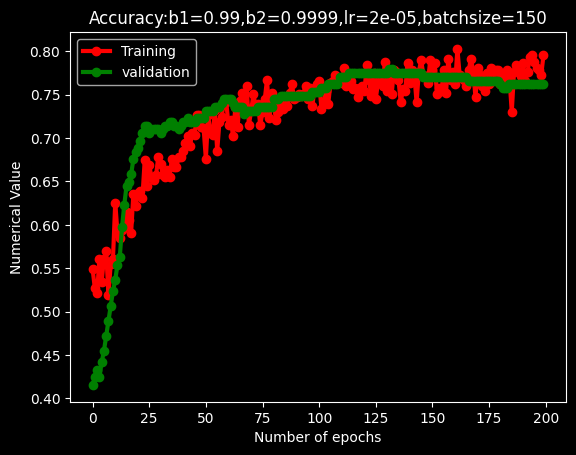

<Figure size 640x480 with 0 Axes>

In [22]:
accuracy_plotter(history)